# Streamflow figures
## Upper Olivares catchment - january, 2023
#### Paul Sandoval Quilodrán - https://github.com/SQPaul/Olivares

#### import packages

In [39]:
import subprocess
import os
import time
import numpy as np
import pandas as pd
import openpyxl
import datetime
import hydroeval as he
from configparser import ConfigParser
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import plotly.express as px

# Qsim - Qobs

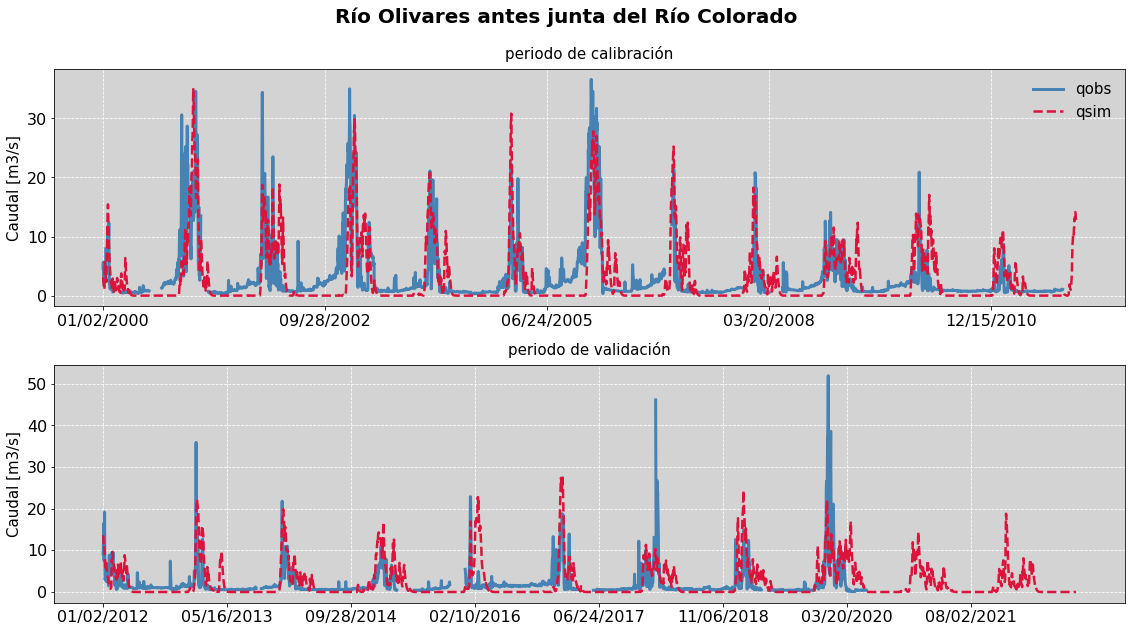

In [34]:
streamflow = pd.read_csv(r"P:\Projects\Olivares\Resultados\qsim_qobs.csv")
"P:\Projects\Olivares\Scenarios\scenarios_3xlsx.xlsx"
streamflow.set_index("Date", inplace=True)
streamflow.index.name = None

#Define subplots dimensions
fig = plt.figure(figsize=(16,9))

#Calibration
ax0 = fig.add_subplot(211)
streamflow.iloc[0:4383,1].plot(ax=ax0, color="steelblue",alpha=1,linewidth=3) #TOKEN
streamflow.iloc[1:4383,0].plot(ax=ax0, color="crimson",alpha=1,ls="--",linewidth=2.5) #TOKEN

#Label
ax0.set_ylabel("Caudal [m3/s]",labelpad=5,fontsize=15)

#Configuration
ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(1,1), bbox_transform=ax0.transAxes,fontsize=15)
plt.title("periodo de calibración",fontsize=15,pad=10)
fig.set_facecolor("white")

#Validation
ax1 = fig.add_subplot(212)
streamflow.iloc[4384:len(streamflow),1].plot(ax=ax1, color="steelblue",alpha=1,linewidth=3) #TOKEN
streamflow.iloc[4384:len(streamflow),0].plot(ax=ax1, color="crimson",alpha=1,ls="--",linewidth=2.5) #TOKEN

#Label
ax1.set_ylabel("Caudal [m3/s]",labelpad=5,fontsize=15)

#Configuration
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
plt.title("periodo de validación",fontsize=15,pad=10)
fig.set_facecolor("white")

#General configuration
plt.tight_layout()
fig.subplots_adjust(top=0.885)
fig.suptitle("Río Olivares antes junta del Río Colorado",fontweight="bold",fontsize=20) #TOKEN
fig.savefig(r"P:\Projects\Olivares\qsim_qobs.png",dpi=600) #TOKEN

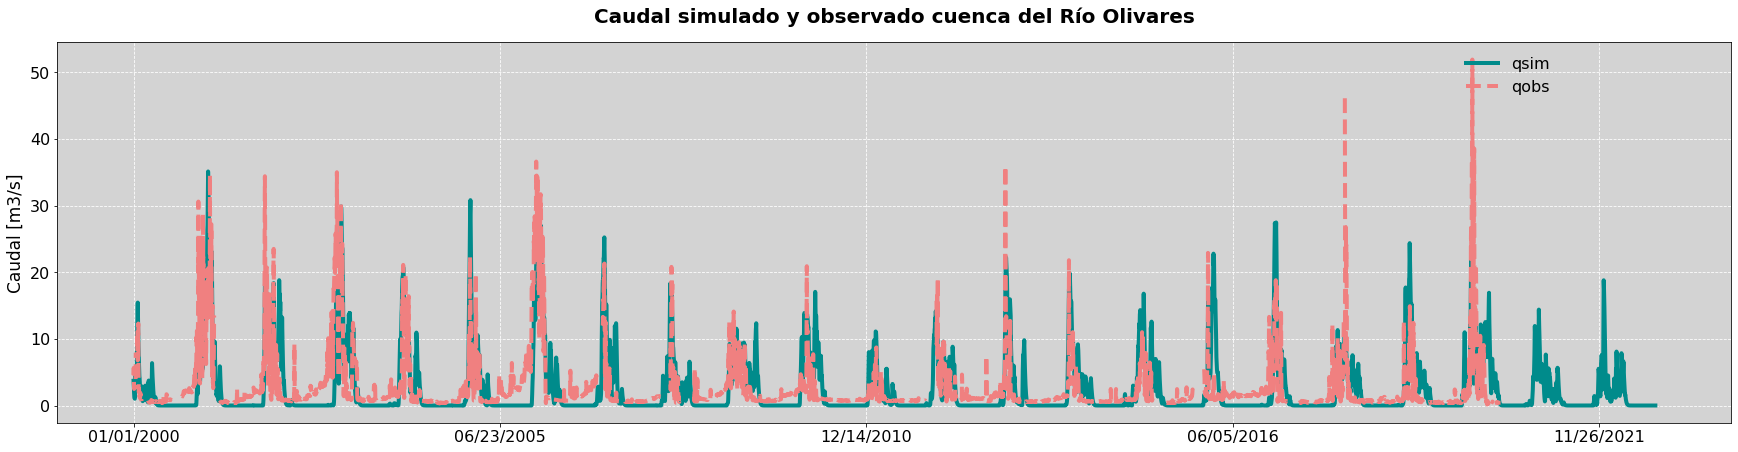

In [38]:
#Define subplots dimensions
fig = plt.figure(figsize=(30,7))

#Análisis multiseñal

ax0 = fig.add_subplot(111)
#ax1 = ax0.twinx()
#multi.iloc[:,1].plot.area(ax=ax0, color="mediumorchid",alpha=0.2)
#multi.iloc[:,2].plot(ax=ax1, color="cornflowerblue", linewidth=2.5, marker="s",markersize=6, markeredgecolor="steelblue",markerfacecolor="steelblue")
#multi.iloc[:,3].plot(ax=ax1, color="mediumaquamarine", linewidth=2.5, marker="s",markersize=6, markeredgecolor="lightseagreen",markerfacecolor="lightseagreen")
#multi.iloc[:,4].plot(ax=ax1, color="lightcoral", linewidth=2.5, marker="s",markersize=6, markeredgecolor="indianred",markerfacecolor="indianred")

streamflow.iloc[:,0].plot(ax=ax0, color="darkcyan", linewidth=4)
streamflow.iloc[:,1].plot(ax=ax0,linestyle="dashed", color="lightcoral", linewidth=4)

#ax1.set_ylabel("Significancia hidrológica [%]",rotation = 270, labelpad=12)
ax0.set_ylabel("Caudal [m3/s]",labelpad=5,fontsize=17)


ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#ax0.set_xticks(np.arange(len(streamflow)))
#ax0.set_xticklabels(streamflow.index)
fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(0.9,1), bbox_transform=ax0.transAxes)
plt.title("Caudal simulado y observado cuenca del Río Olivares",fontsize=20,pad=20,fontweight="bold")
fig.set_facecolor("white")
plt.rcParams.update({'font.size': 16})

fig.savefig(r"P:\Projects\Olivares\Calibration\sim_vs_obs.png")

In [36]:
streamflow

qsim  qobs
01/01/2000  3.710260e+00  4.58
01/02/2000  3.083660e+00  5.65
01/03/2000  2.465650e+00  4.05
01/04/2000  2.095130e+00  2.48
01/05/2000  1.622500e+00  2.76
...                  ...   ...
09/25/2022  9.300000e-20   NaN
09/26/2022  6.980000e-20   NaN
09/27/2022  5.230000e-20   NaN
09/28/2022  3.920000e-20   NaN
09/29/2022  2.940000e-20   NaN

[8308 rows x 2 columns]

# Stations comparison

In [17]:
streamflow = pd.read_csv(r"P:\Projects\Olivares\Streamflow\analysis_2sta\test.csv")
streamflow.index = streamflow["date"] 
#streamflow.index.name = ""

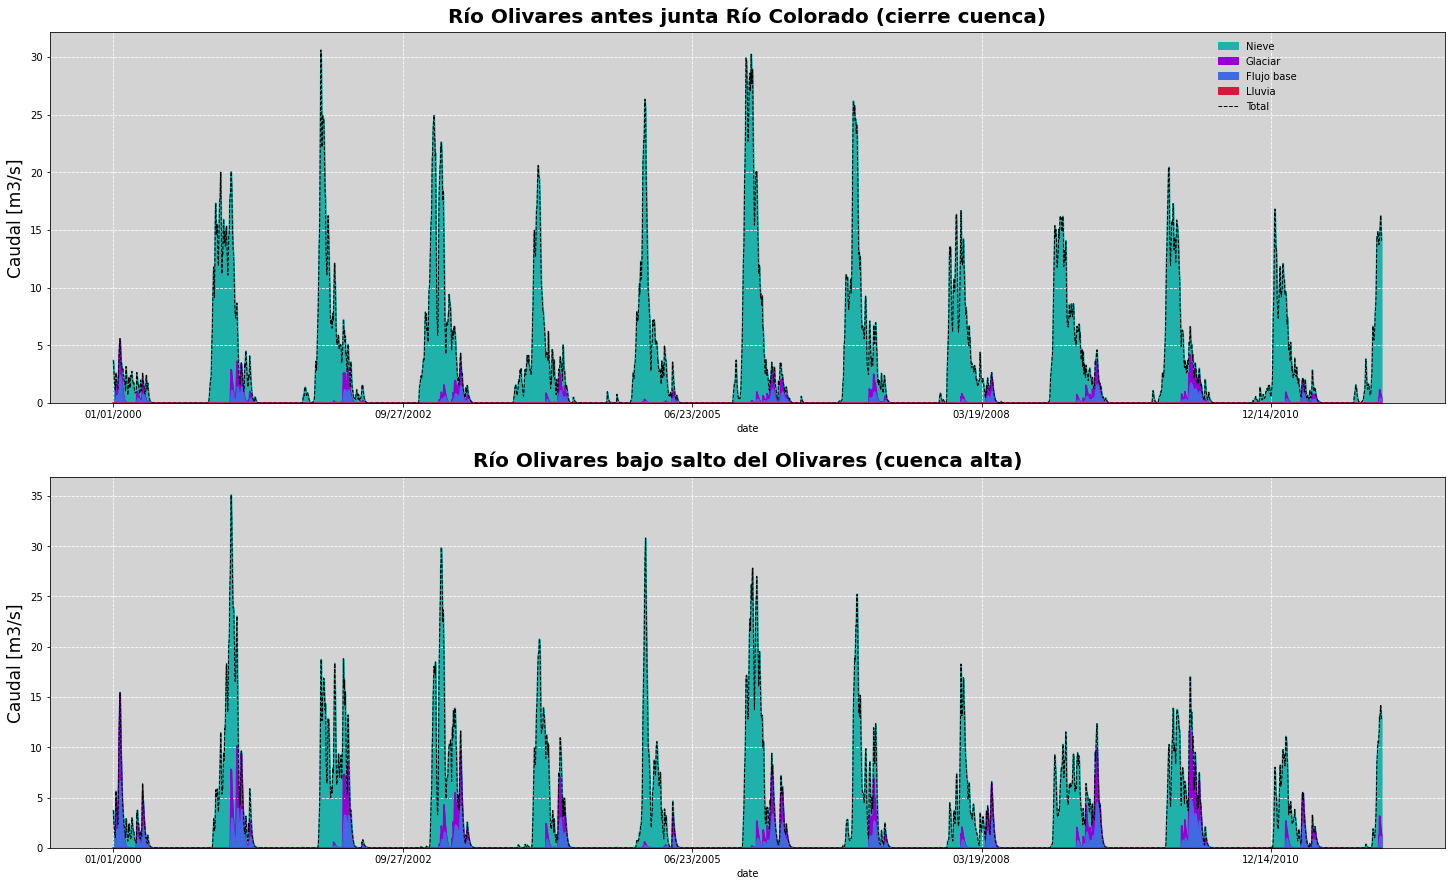

In [18]:
#Define subplots dimensions
fig = plt.figure(figsize=(25,15))

#11111111

ax0 = fig.add_subplot(211)

streamflow.iloc[:,1].plot.area(ax=ax0, color="lightseagreen",alpha=1)
streamflow.iloc[:,2].plot.area(ax=ax0, color="darkviolet",alpha=1)
streamflow.iloc[:,3].plot.area(ax=ax0, color="royalblue",alpha=1)
streamflow.iloc[:,4].plot.area(ax=ax0, color="crimson",alpha=1)
streamflow.iloc[:,5].plot(ax=ax0, color="black",alpha=1,linewidth=1,linestyle="dashed")

ax0.set_ylabel("Caudal [m3/s]",labelpad=5,fontsize=17)


ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#ax0.set_xticks(np.arange(len(streamflow)))
#ax0.set_xticklabels(streamflow.index)
fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(0.9,1), bbox_transform=ax0.transAxes)
plt.title("Río Olivares antes junta Río Colorado (cierre cuenca)",fontsize=20,pad=10,fontweight="bold")
fig.set_facecolor("white")
#plt.rcParams.update({'font.size': 16})


#11111111

ax1 = fig.add_subplot(212)

streamflow.iloc[:,6].plot.area(ax=ax1, color="lightseagreen",alpha=1)
streamflow.iloc[:,7].plot.area(ax=ax1, color="darkviolet",alpha=1)
streamflow.iloc[:,8].plot.area(ax=ax1, color="royalblue",alpha=1)
streamflow.iloc[:,9].plot.area(ax=ax1, color="crimson",alpha=1)
streamflow.iloc[:,10].plot(ax=ax1, color="black",alpha=1,linewidth=1,linestyle="dashed")

ax1.set_ylabel("Caudal [m3/s]",labelpad=5,fontsize=17)


ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#ax0.set_xticks(np.arange(len(streamflow)))
#ax0.set_xticklabels(streamflow.index)
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(0.9,1), bbox_transform=ax1.transAxes)
plt.title("Río Olivares bajo salto del Olivares (cuenca alta)",fontsize=20,pad=10,fontweight="bold")
fig.set_facecolor("white")
#plt.rcParams.update({'font.size': 16})


fig.savefig(r"P:\Projects\Olivares\Calibration\station_comparison.png")

# Results v2

Text(0.5, 0.98, 'Fuente de caudales simulados Río Olivares antes junta del Río Colorado')

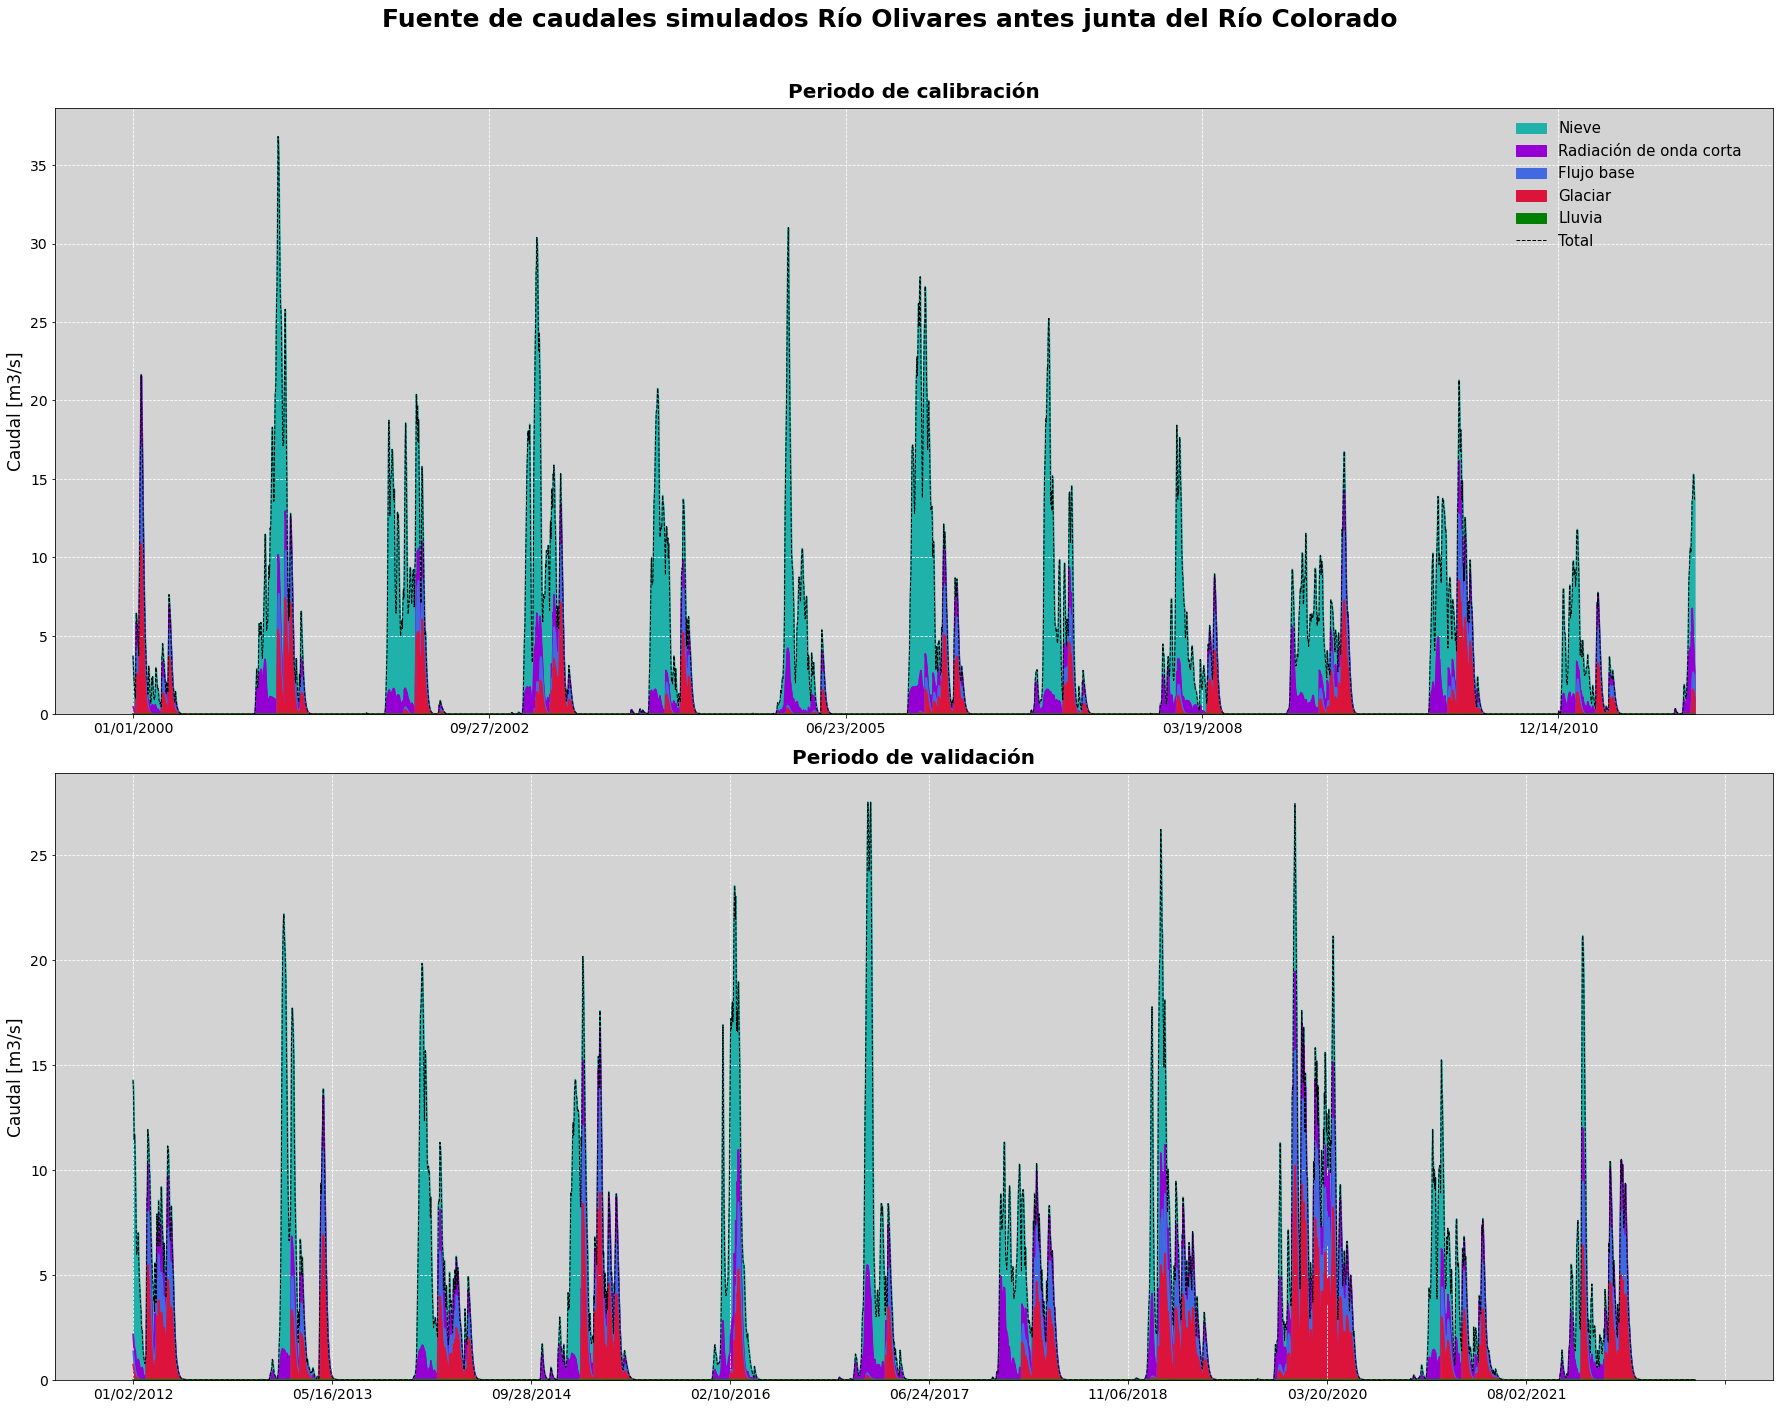

In [41]:
streamflow = pd.read_csv(r"P:\Projects\Olivares\Streamflow\qsim_v2csv.csv")
streamflow.index = streamflow["date"]
streamflow.index.name = ""


#Define subplots dimensions
fig = plt.figure(figsize=(25,20))

#11111111

ax0 = fig.add_subplot(211)

streamflow.iloc[0:4383,8].plot.area(ax=ax0, color="lightseagreen",alpha=1,label="Nieve")
streamflow.iloc[0:4383,9].plot.area(ax=ax0, color="darkviolet",alpha=1,label="Radiación de onda corta")
streamflow.iloc[0:4383,10].plot.area(ax=ax0, color="royalblue",alpha=1,label="Flujo base")
streamflow.iloc[0:4383,11].plot.area(ax=ax0, color="crimson",alpha=1,label="Glaciar")
streamflow.iloc[0:4383,12].plot.area(ax=ax0, color="green",alpha=1,label="Lluvia")
streamflow.iloc[0:4383,13].plot(ax=ax0, color="black",alpha=1,linewidth=1,linestyle="dashed",label="Total")

ax0.set_ylabel("Caudal [m3/s]",labelpad=5,fontsize=17)


ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#ax0.set_xticks(np.arange(len(streamflow)))
#ax0.set_xticklabels(streamflow.index)
fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(0.99,1), bbox_transform=ax0.transAxes,prop={'size': 15})
plt.title("Periodo de calibración",fontsize=20,pad=10,fontweight="bold")
fig.set_facecolor("white")
#plt.rcParams.update({'font.size': 16})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#11111111

ax1 = fig.add_subplot(212)

streamflow.iloc[4384:len(streamflow),8].plot.area(ax=ax1, color="lightseagreen",alpha=1)
streamflow.iloc[4384:len(streamflow),9].plot.area(ax=ax1, color="darkviolet",alpha=1)
streamflow.iloc[4384:len(streamflow),10].plot.area(ax=ax1, color="royalblue",alpha=1)
streamflow.iloc[4384:len(streamflow),11].plot.area(ax=ax1, color="crimson",alpha=1)
streamflow.iloc[4384:len(streamflow),12].plot.area(ax=ax1, color="green",alpha=1)
streamflow.iloc[4384:len(streamflow),13].plot(ax=ax1, color="black",alpha=1,linewidth=1,linestyle="dashed")

ax1.set_ylabel("Caudal [m3/s]",labelpad=5,fontsize=17)


ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#ax0.set_xticks(np.arange(len(streamflow)))
#ax0.set_xticklabels(streamflow.index)
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(0.9,1), bbox_transform=ax1.transAxes)
plt.title("Periodo de validación",fontsize=20,pad=10,fontweight="bold")
fig.set_facecolor("white")
#plt.rcParams.update({'font.size': 16})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#General configuration
plt.tight_layout()
fig.subplots_adjust(top=0.91)
fig.suptitle("Fuente de caudales simulados Río Olivares antes junta del Río Colorado",fontweight="bold",fontsize=25) #TOKEN
#fig.savefig(r"P:\Projects\Olivares\Rio_Olivares_simsignature.png",dpi=600) #TOKEN

In [42]:
streamflow

date  baseflow  rain  glac'  snow'    sw  sim'   obs  Snow  \
                                                                               
01/01/2000  01/01/2000       0.0     0    0.0   3.25  0.46  3.71  4.58  3.71   
01/02/2000  01/02/2000       0.0     0    0.0   2.68  0.40  3.08  5.65  3.08   
01/03/2000  01/03/2000       0.0     0    0.0   2.13  0.34  2.47  4.05  2.47   
01/04/2000  01/04/2000       0.0     0    0.0   1.79  0.31  2.10  2.48  2.10   
01/05/2000  01/05/2000       0.0     0    0.0   1.38  0.24  1.62  2.76  1.62   
...                ...       ...   ...    ...    ...   ...   ...   ...   ...   
09/25/2022  09/25/2022       0.0     0    0.0   0.00  0.00  0.00   NaN  0.00   
09/26/2022  09/26/2022       0.0     0    0.0   0.00  0.00  0.00   NaN  0.00   
09/27/2022  09/27/2022       0.0     0    0.0   0.00  0.00  0.00   NaN  0.00   
09/28/2022  09/28/2022       0.0     0    0.0   0.00  0.00  0.00   NaN  0.00   
09/29/2022  09/29/2022       0.0     0    0.0   0.00  0.00  0.00   NaN  0.00   

              Sw  Baseflow  Glacier  Rain   Sim   Obs  
                                                       
01/01/2000  0.46       0.0      0.0     0  3.71  4.58  
01/02/2000  0.40       0.0      0.0     0  3.08  5.65  
01/03/2000  0.34       0.0      0.0     0  2.47  4.05  
01/04/2000  0.31       0.0      0.0     0  2.10  2.48  
01/05/2000  0.24       0.0      0.0     0  1.62  2.76  
...          ...       ...      ...   ...   ...   ...  
09/25/2022  0.00       0.0      0.0     0  0.00   NaN  
09/26/2022  0.00       0.0      0.0     0  0.00   NaN  
09/27/2022  0.00       0.0      0.0     0  0.00   NaN  
09/28/2022  0.00       0.0      0.0     0  0.00   NaN  
09/29/2022  0.00       0.0      0.0     0  0.00   NaN  

[8308 rows x 15 columns]

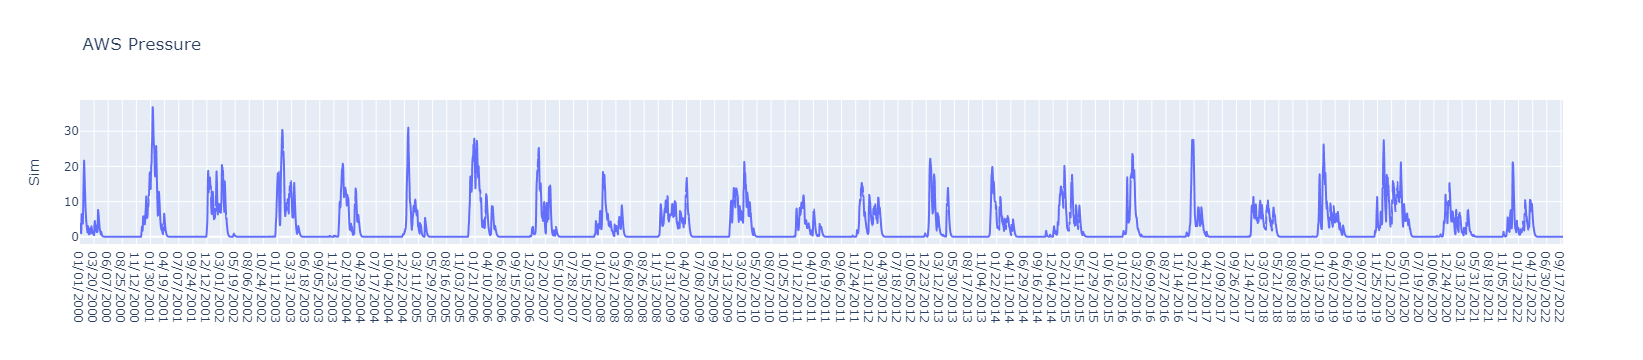

In [44]:
fig = px.line(streamflow, x=streamflow.index, y="Sim", title='AWS Pressure')
fig.show()

In [45]:
streamflow = pd.read_csv(r"P:\Projects\Olivares\Streamflow\qsim_v2_pie.csv")
streamflow.index = streamflow["name"] 
streamflow

name      cal       cal%      val       val%
name                                                      
Baseflow  Baseflow  1083.91   8.992902  1562.90  17.794583
Rain          Rain     0.00   0.000000     0.00   0.000000
Glacier    Glacier   519.65   4.311393   754.57   8.591246
Snow          Snow  8712.87  72.288278  4807.57  54.737157
Sw              Sw  1736.52  14.407427  1657.97  18.877014

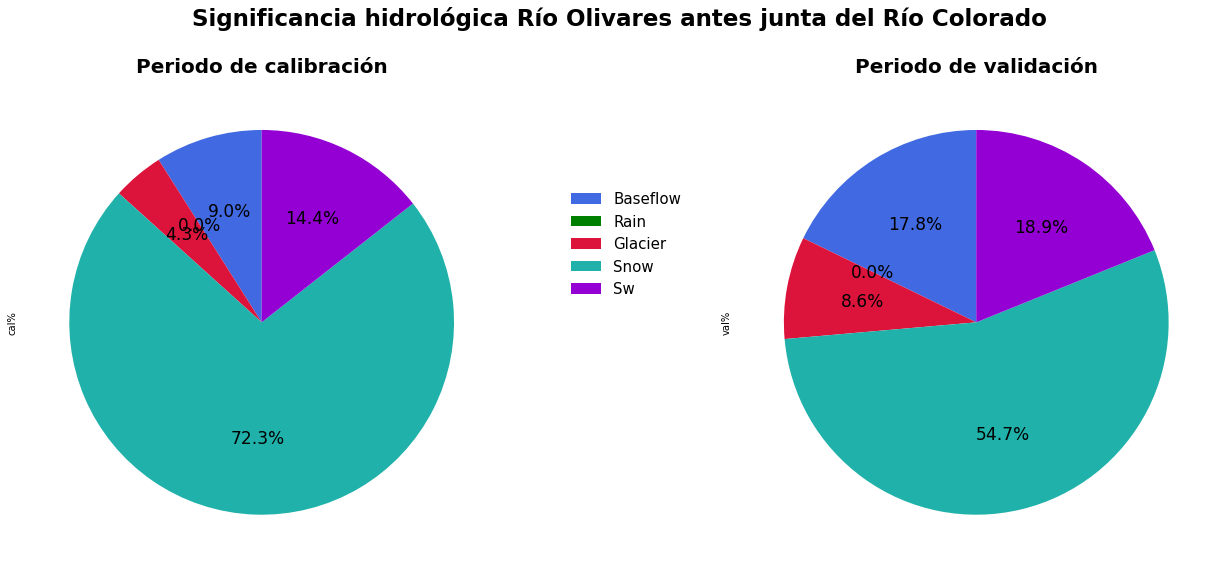

In [91]:
#Define subplots dimensions
fig = plt.figure(figsize=(20,15))

#11111111

ax0 = fig.add_subplot(221)
streamflow.plot.pie(ax=ax0, y="cal%", labels=None, autopct='%1.1f%%', 
                    startangle=90, legend=False, fontsize=17,
                    colors=["royalblue","green","crimson","lightseagreen","darkviolet"])

fig.legend(labels=streamflow["name"],loc="upper right",frameon=False,bbox_to_anchor=(1.4,0.8), bbox_transform=ax0.transAxes,prop={'size': 15})
plt.title("Periodo de calibración",fontsize=20,pad=10,fontweight="bold")

ax1 = fig.add_subplot(222)
streamflow.plot.pie(ax=ax1, y="val%", labels=None, autopct='%1.1f%%',
                    startangle=90,legend=False,fontsize=17,
                    colors=["royalblue","green","crimson","lightseagreen","darkviolet"])

plt.title("Periodo de validación",fontsize=20,pad=10,fontweight="bold")
fig.set_facecolor("white")

plt.tight_layout()
fig.subplots_adjust(top=0.91)
fig.suptitle("Significancia hidrológica Río Olivares antes junta del Río Colorado",fontweight="bold",fontsize=23) #TOKEN
fig.savefig(r"P:\Projects\Olivares\Rio_Olivares_simsignature2.png",dpi=600) #TOKEN

# Scenarios

In [2]:
streamflow = pd.read_excel(r"P:\Projects\Olivares\Scenarios\scenarios_3xlsx.xlsx")
#streamflow.set_index("Date", inplace=True)
streamflow.index.name = None
streamflow

dates = streamflow.iloc[:,0]
dates

streamflow

Date            v1            v2            v3
0    2024-01-01  1.627550e-01  1.083030e+00  1.127840e+00
1    2024-01-02  1.655180e-01  9.265390e-01  1.381640e+00
2    2024-01-03  1.536450e-01  7.100420e-01  1.415940e+00
3    2024-01-04  1.297540e-01  5.325310e-01  1.158860e+00
4    2024-01-05  1.528950e-01  5.645210e-01  1.088440e+00
...         ...           ...           ...           ...
2459 2030-09-25  1.620000e-20  1.630000e-19  1.623270e-19
2460 2030-09-26  1.210000e-20  1.230000e-19  1.217470e-19
2461 2030-09-27  9.100000e-21  9.190000e-20  9.131120e-20
2462 2030-09-28  6.830000e-21  6.890000e-20  6.848420e-20
2463 2030-09-29  5.120000e-21  5.170000e-20  5.136370e-20

[2464 rows x 4 columns]

<Figure size 1152x648 with 0 Axes>

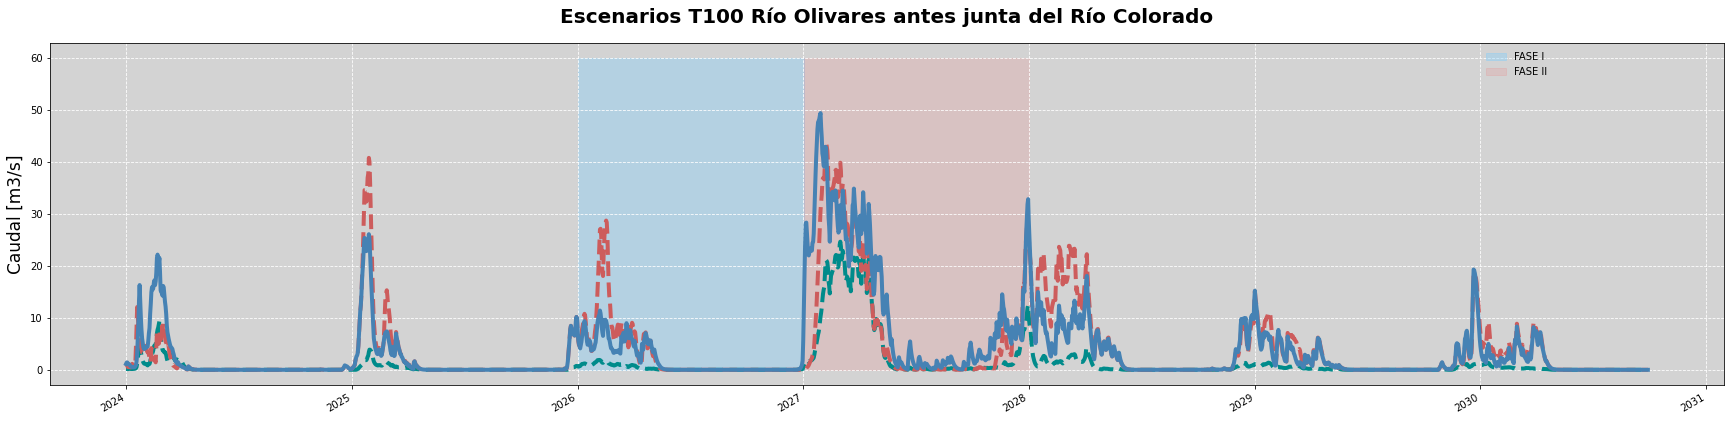

In [3]:
#Define subplots dimensions
fig = plt.figure(figsize=(16,9))

#Define subplots dimensions
fig = plt.figure(figsize=(30,7))

#Análisis multiseñal

ax0 = fig.add_subplot(111)
#ax1 = ax0.twinx()
#multi.iloc[:,1].plot.area(ax=ax0, color="mediumorchid",alpha=0.2)
#multi.iloc[:,2].plot(ax=ax1, color="cornflowerblue", linewidth=2.5, marker="s",markersize=6, markeredgecolor="steelblue",markerfacecolor="steelblue")
#multi.iloc[:,3].plot(ax=ax1, color="mediumaquamarine", linewidth=2.5, marker="s",markersize=6, markeredgecolor="lightseagreen",markerfacecolor="lightseagreen")
#multi.iloc[:,4].plot(ax=ax1, color="lightcoral", linewidth=2.5, marker="s",markersize=6, markeredgecolor="indianred",markerfacecolor="indianred")

#streamflow.iloc[:,0].plot(ax=ax0, color="darkcyan",linestyle="dashed",linewidth=4)


#ax1.set_ylabel("Significancia hidrológica [%]",rotation = 270, labelpad=12)
ax0.set_ylabel("Caudal [m3/s]",labelpad=5,fontsize=17)

ax0.plot(streamflow.iloc[:,0],streamflow.iloc[:,1], color="darkcyan",linestyle="dashed",linewidth=4)
ax0.plot(streamflow.iloc[:,0],streamflow.iloc[:,2], color="indianred",linestyle="dashed",linewidth=4)
ax0.plot(streamflow.iloc[:,0],streamflow.iloc[:,3], color="steelblue",linewidth=4)
#streamflow.iloc[:,1].plot(ax=ax0, color="indianred",linestyle="dashed",linewidth=4)
#streamflow.iloc[:,2].plot(ax=ax0, color="steelblue", linewidth=4)

left1, bottom1, width1, height1 = (20455, 0, 365, 60)
left2, bottom2, width2, height2 = (20820, 0, 365, 60)
#left3, bottom3, width3, height3 = (17.5, -5, 8, 10)
#left4, bottom4, width4, height4 = (25.5, -5, 8, 10)
#left5, bottom5, width5, height5 = (33.5, -5, 2, 10)
#left6, bottom6, width6, height6 = (35.5, -5, 2, 10)
rect1=mpatches.Rectangle((left1,bottom1),width1,height1, fill=True, color="lightskyblue",alpha=0.4,label="FASE I")
rect2=mpatches.Rectangle((left2,bottom2),width2,height2, fill=True, color="lightcoral",alpha=0.2,label="FASE II")
#rect3=mpatches.Rectangle((left3,bottom3),width3,height3, fill=True, color="steelblue",alpha=0.2,label="glacier")
#rect4=mpatches.Rectangle((left4,bottom4),width4,height4, fill=True, color="turquoise",alpha=0.2,label="snow")
#rect5=mpatches.Rectangle((left5,bottom5),width5,height5, fill=True, color="gold",alpha=0.2,label="climate")
#rect6=mpatches.Rectangle((left6,bottom6),width6,height6, fill=True, color="crimson",alpha=0.2,label="routing")
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
#plt.gca().add_patch(rect3)
#plt.gca().add_patch(rect4)
#plt.gca().add_patch(rect5)
#plt.gca().add_patch(rect6)

ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#ax0.set_xticks(np.arange(len(streamflow)))
#ax0.set_xticklabels(streamflow.index)
fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(0.9,1), bbox_transform=ax0.transAxes)
plt.title("Escenarios T100 Río Olivares antes junta del Río Colorado",fontsize=20,pad=20,fontweight="bold")
fig.set_facecolor("white")
plt.rcParams.update({'font.size': 16})
plt.gcf().autofmt_xdate()


fig.savefig(r"P:\Projects\Olivares\EscenariosT100.png")

# Results

In [35]:
streamflow = pd.read_excel(r"P:\Projects\Olivares\Scenarios\Results_2.xlsx")
#streamflow.set_index("Date", inplace=True)
streamflow.index.name = None
streamflow

dates = streamflow.iloc[:,0]
dates

streamflow

Date      qsim  qobs          t100
0    2019-01-01   8.35003  5.88           NaN
1    2019-01-02  11.79720  5.70           NaN
2    2019-01-03  15.03490  4.06           NaN
3    2019-01-04  16.67970  4.29           NaN
4    2019-01-05  17.70950  3.85           NaN
...         ...       ...   ...           ...
4285 2030-09-25       NaN   NaN  1.631630e-19
4286 2030-09-26       NaN   NaN  1.223740e-19
4287 2030-09-27       NaN   NaN  9.178140e-20
4288 2030-09-28       NaN   NaN  6.883680e-20
4289 2030-09-29       NaN   NaN  5.162820e-20

[4290 rows x 4 columns]

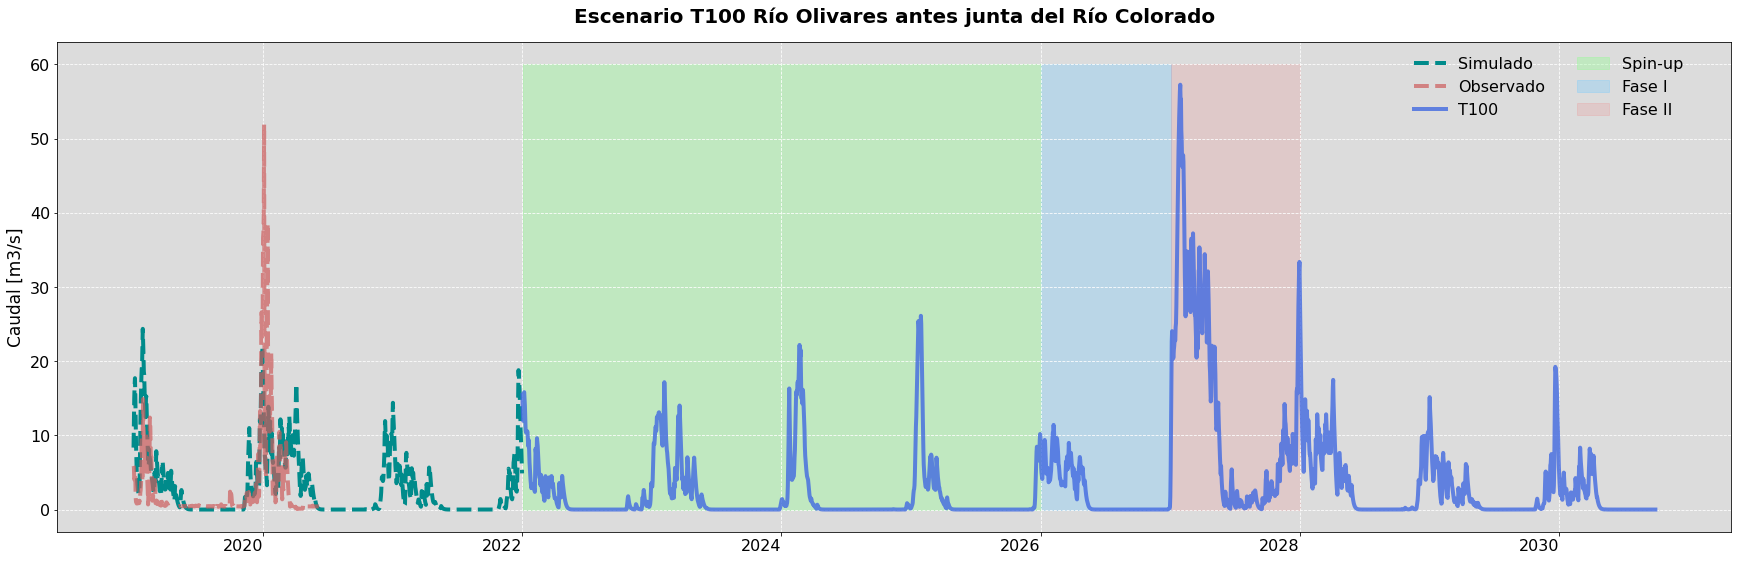

In [38]:
#Define subplots dimensions
fig = plt.figure(figsize=(30,10))

#Análisis multiseñal

ax0 = fig.add_subplot(111)

ax0.set_ylabel("Caudal [m3/s]",labelpad=5,fontsize=17)

ax0.plot(streamflow.iloc[:,0],streamflow.iloc[:,1], color="darkcyan",linestyle="dashed",linewidth=4,label="Simulado")
ax0.plot(streamflow.iloc[:,0],streamflow.iloc[:,2], color="indianred",linestyle="dashed",linewidth=4,alpha=0.7,label="Observado")
ax0.plot(streamflow.iloc[:,0],streamflow.iloc[:,3], color="royalblue",linewidth=4,label="T100",alpha=0.8)

left3, bottom3, width3, height3 = (20455-365*4, 0, 365*4, 60)
left1, bottom1, width1, height1 = (20455, 0, 365, 60)
left2, bottom2, width2, height2 = (20820, 0, 365, 60)

rect3=mpatches.Rectangle((left3,bottom3),width3,height3, fill=True, color="palegreen",alpha=0.4,label="Spin-up")
rect1=mpatches.Rectangle((left1,bottom1),width1,height1, fill=True, color="lightskyblue",alpha=0.4,label="Fase I")
rect2=mpatches.Rectangle((left2,bottom2),width2,height2, fill=True, color="lightcoral",alpha=0.2,label="Fase II")

plt.gca().add_patch(rect3)
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)

ax0.set_facecolor("gainsboro")
plt.grid(ls="--",color="white")

fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(0.98,1), bbox_transform=ax0.transAxes,ncol=2)
plt.title("Escenario T100 Río Olivares antes junta del Río Colorado",fontsize=20,pad=20,fontweight="bold")
fig.set_facecolor("white")
plt.rcParams.update({'font.size': 16})
plt.gcf().autofmt_xdate()
plt.xticks(rotation = 0)

plt.show()

fig.savefig(r"P:\Projects\Olivares\EscenariosT100_Result2.png")

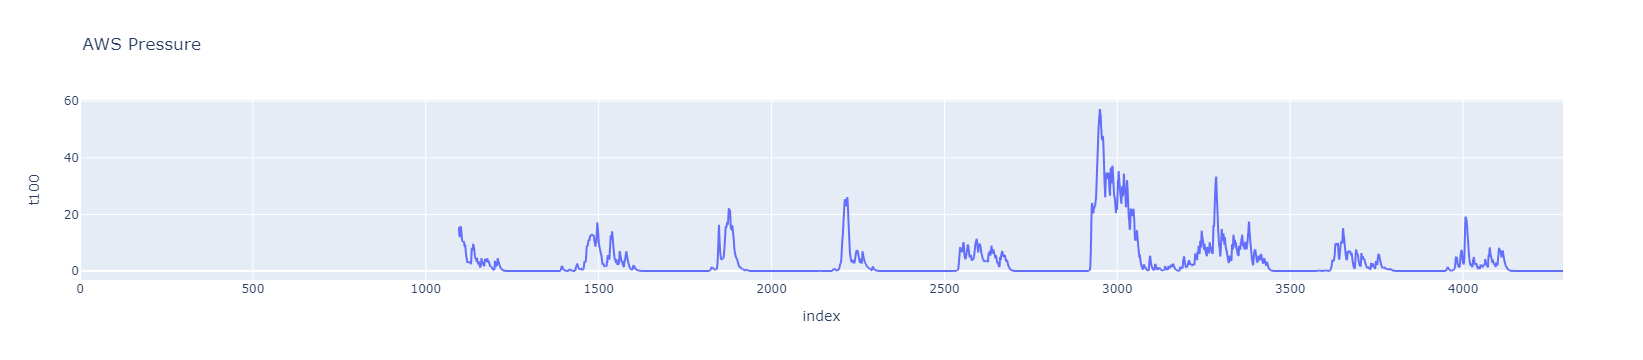

In [40]:
fig = px.line(streamflow, x=streamflow.index, y="t100", title='AWS Pressure')
fig.show()

## PP time-series

In [6]:
pp = pd.read_csv(r"P:\Projects\Olivares\Scenarios\forcings_time-series\pp_bckp.csv")
pp.set_index("date", inplace=True)
pp.index.name = None
pp

dates = pp.iloc[:,0]
dates

01/01/2000    1.211703
01/02/2000    1.169892
01/03/2000    0.798473
01/04/2000    0.550551
01/05/2000    0.161346
                ...   
09/25/2022    0.019611
09/26/2022    0.006032
09/27/2022    0.013732
09/28/2022    1.113958
09/29/2022    0.417483
Name: pp, Length: 8308, dtype: float64

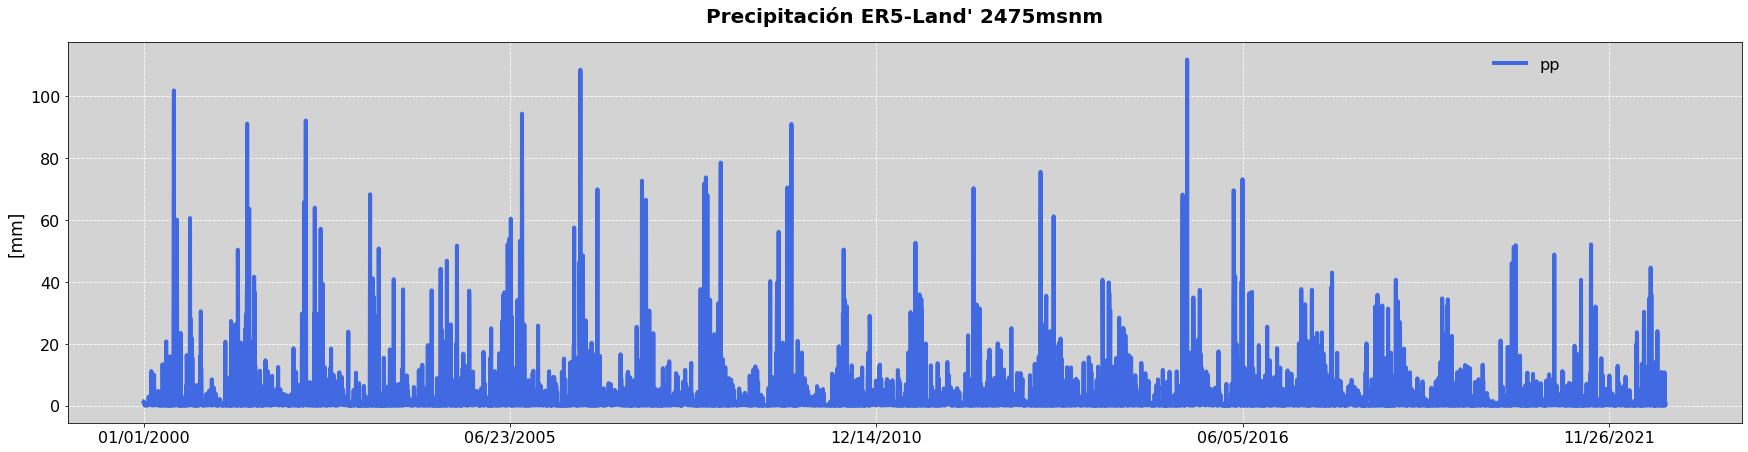

In [14]:
#Define subplots dimensions
fig = plt.figure(figsize=(30,7))

#Análisis multiseñal

ax0 = fig.add_subplot(111)
#ax1 = ax0.twinx()
#multi.iloc[:,1].plot.area(ax=ax0, color="mediumorchid",alpha=0.2)
#multi.iloc[:,2].plot(ax=ax1, color="cornflowerblue", linewidth=2.5, marker="s",markersize=6, markeredgecolor="steelblue",markerfacecolor="steelblue")
#multi.iloc[:,3].plot(ax=ax1, color="mediumaquamarine", linewidth=2.5, marker="s",markersize=6, markeredgecolor="lightseagreen",markerfacecolor="lightseagreen")
#multi.iloc[:,4].plot(ax=ax1, color="lightcoral", linewidth=2.5, marker="s",markersize=6, markeredgecolor="indianred",markerfacecolor="indianred")

pp.iloc[:,0].plot(ax=ax0, color="royalblue", linewidth=4)
#streamflow.iloc[:,5].plot(ax=ax0,linestyle="dashed", color="lightcoral", linewidth=4)

#ax1.set_ylabel("Significancia hidrológica [%]",rotation = 270, labelpad=12)
ax0.set_ylabel("[mm]",labelpad=5,fontsize=17)


ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#ax0.set_xticks(np.arange(len(streamflow)))
#ax0.set_xticklabels(streamflow.index)
fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(0.9,1), bbox_transform=ax0.transAxes)
plt.title("Precipitación ER5-Land' 2475msnm",fontsize=20,pad=20,fontweight="bold")
fig.set_facecolor("white")
plt.rcParams.update({'font.size': 16})

fig.savefig(r"P:\Projects\Olivares\pp.png")

In [ ]:
pp = "P:\Projects\Olivares\Scenarios\forcings_time-series\pp_bckp.csv"

In [ ]:
pp